# Example of `credo_cf` usage in Jupyter Lab

In [ ]:
# Do not run when you install credo_cf by pip as package!
# Run it only when you git clone credo_cf to local directory

import os
import sys
credo_cf_path = '../src'  # path to local directory with credo_cf sources
sys.path.insert(0, os.path.abspath(credo_cf_path))

## Load detections from JSON file

The `load_json` returns tuple.
First from tuple is the list of python's dict objects called *detections*,
because each object contains values of single cosmic-ray detection.
Second is the count of all loaded objects from JSON file including skipped by callback function in second arg.

**Important!** All `credo_cf` functions working on *detection* or list of *detections*, not pandas!

Functions from `credo_cf` uses some values from keys in *detection* and store result in another keys values in *detection*. All is described in docstring of these function.

In [2]:
from credo_cf import load_json, progress_and_process_image

# Load from JSON
objects, count = load_json('/tmp/big_example.json', progress_and_process_image)
print("Load %d detections of cosmic-ray" % count)

... just parsed 10000 and skip 1 objects.
... just parsed 20000 and skip 1 objects.
... just parsed 30000 and skip 1 objects.
... just parsed 40000 and skip 1 objects.
... just parsed 50000 and skip 1 objects.
... just parsed 60000 and skip 1 objects.
... just parsed 70000 and skip 1 objects.
... just parsed 80000 and skip 1 objects.
Load 80187 detections of cosmic-ray


## Import *detections* list do Pandas

In [3]:
import pandas as pd

# Load to pandas for view data in Jupyter Lab
df = pd.DataFrame(objects)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80187 entries, 0 to 80186
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             80187 non-null  int64  
 1   accuracy       80187 non-null  float64
 2   altitude       80187 non-null  float64
 3   height         80187 non-null  int64  
 4   width          80187 non-null  int64  
 5   x              80187 non-null  int64  
 6   y              80187 non-null  int64  
 7   latitude       80187 non-null  float64
 8   longitude      80187 non-null  float64
 9   provider       80187 non-null  object 
 10  timestamp      80187 non-null  int64  
 11  time_received  80187 non-null  int64  
 12  source         80187 non-null  object 
 13  visible        80187 non-null  bool   
 14  metadata       80187 non-null  object 
 15  device_id      80187 non-null  int64  
 16  user_id        80187 non-null  int64  
 17  team_id        80187 non-null  int64  
 18  image 

,id,accuracy,altitude,height,width,x,y,latitude,longitude,provider,...,visible,metadata,device_id,user_id,team_id,image,crop_size,edge,crop_x,crop_y
0,17453223,10.00000,95.059221,480,720,714,20,52.289544,21.032308,gps,...,False,,10580,15149,2724,<PIL.Image.Image image mode=RGBA size=36x50 at...,"(36, 50)",True,684,0
1,17453224,2.34835,260.620000,1080,1440,649,325,51.739684,19.567084,gps,...,True,,13784,1584,1,<PIL.Image.Image image mode=RGBA size=60x60 at...,"(60, 60)",False,619,295
2,17453225,16.08000,257.000000,640,480,143,21,50.037013,21.397711,gps,...,False,,4250,5606,1197,<PIL.Image.Image image mode=RGBA size=20x20 at...,"(20, 20)",False,133,11
3,17453226,16.08000,257.000000,640,480,224,296,50.037013,21.397711,gps,...,True,,4250,5606,1197,<PIL.Image.Image image mode=RGBA size=20x20 at...,"(20, 20)",False,214,286
4,17453227,10.00000,95.059221,480,720,19,472,52.289544,21.032308,gps,...,False,,10580,15149,2724,<PIL.Image.Image image mode=RGBA size=49x38 at...,"(49, 38)",True,0,442


## Save and restore *detections*

Load from JSON may be heavy when detections are a lot.
List of *detections*, with result of `credo_cf` functions may be stored in binary file and load fast.

In [4]:
from credo_cf import serialize

# save to file
serialize('/tmp/credo_cf.tmp', objects)

In [5]:
from credo_cf import deserialize

# restore from file
objects = deserialize('/tmp/credo_cf.tmp')

## Group by and example of some classify functions

Some classification functions required *detections* list gruped by *device_id* (`too_often`)
or *resolution* (`hot_pixel`, `near_hot_pixel`, `near_hot_pixel2`)
because these functions counting *detections* by specyfic value.

**Important!** result of these functions is depend of size of *detections* list.

In [6]:
from credo_cf import group_by_device_id, group_by_resolution, too_often, hot_pixel, near_hot_pixel, near_hot_pixel2

by_device_id = group_by_device_id(objects)

for device_id, detections in by_device_id.items():
    by_resolution = group_by_resolution(detections)
    too_often(detections, 3)
    for resolution, ds in by_resolution.items():
        hot_pixel(ds, 3)
        near_hot_pixel(ds, 2, 5)
        near_hot_pixel2(ds, 2, 5)
        
# Load to pandas for view data in Jupyter Lab
df = pd.DataFrame(objects)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80187 entries, 0 to 80186
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             80187 non-null  int64  
 1   accuracy                       80187 non-null  float64
 2   altitude                       80187 non-null  float64
 3   height                         80187 non-null  int64  
 4   width                          80187 non-null  int64  
 5   x                              80187 non-null  int64  
 6   y                              80187 non-null  int64  
 7   latitude                       80187 non-null  float64
 8   longitude                      80187 non-null  float64
 9   provider                       80187 non-null  object 
 10  timestamp                      80187 non-null  int64  
 11  time_received                  80187 non-null  int64  
 12  source                         80187 non-null 

,id,accuracy,altitude,height,width,x,y,latitude,longitude,provider,...,crop_size,edge,crop_x,crop_y,artifact_too_often,classified,artifact_hot_pixel,artifact_near_hot_pixel_refxy,artifact_near_hot_pixel,artifact_near_hot_pixel2
0,17453223,10.00000,95.059221,480,720,714,20,52.289544,21.032308,gps,...,"(36, 50)",True,684,0,2080,artifact,456,"(714, 20)",456,457
1,17453224,2.34835,260.620000,1080,1440,649,325,51.739684,19.567084,gps,...,"(60, 60)",False,619,295,334,artifact,1,"(649, 325)",1,2
2,17453225,16.08000,257.000000,640,480,143,21,50.037013,21.397711,gps,...,"(20, 20)",False,133,11,789,artifact,356,"(143, 21)",356,357
3,17453226,16.08000,257.000000,640,480,224,296,50.037013,21.397711,gps,...,"(20, 20)",False,214,286,789,artifact,1,"(224, 296)",1,2
4,17453227,10.00000,95.059221,480,720,19,472,52.289544,21.032308,gps,...,"(49, 38)",True,0,442,2080,artifact,646,"(19, 472)",646,647


I.e. the result of `too_often` is the *artifact_too_often* key value in *detection*.

## Using Python to filter detections by values in keys

In [7]:
filtered = filter(lambda x: not x['edge'] and x['artifact_too_often'] < 4 and x['artifact_hot_pixel'] < 2 and x['artifact_near_hot_pixel'] < 2 and x['artifact_near_hot_pixel2'] < 3, detections)

# Load to pandas for view data in Jupyter Lab
df_filtered = pd.DataFrame(filtered)
df_filtered.head()

""


## Using Pandas to filter detections

In [8]:
df_filtered = df[df.edge.eq(False) & df.artifact_too_often.lt(4) & df.artifact_hot_pixel.lt(2) & df.artifact_near_hot_pixel.lt(2) & df.artifact_near_hot_pixel2.lt(3)]
df_filtered.head()

,id,accuracy,altitude,height,width,x,y,latitude,longitude,provider,...,crop_size,edge,crop_x,crop_y,artifact_too_often,classified,artifact_hot_pixel,artifact_near_hot_pixel_refxy,artifact_near_hot_pixel,artifact_near_hot_pixel2
6631,17459854,0.0,0.0,1080,1920,1352,172,0.0,0.0,none,...,"(60, 60)",False,1322,142,0,artifact,1,"(1352, 172)",1,2
6632,17459855,0.0,0.0,1080,1920,1642,258,0.0,0.0,none,...,"(60, 60)",False,1612,228,0,artifact,1,"(1642, 258)",1,2
6633,17459856,0.0,0.0,1080,1920,92,443,0.0,0.0,none,...,"(60, 60)",False,62,413,0,artifact,1,"(92, 443)",1,2
6634,17459857,0.0,0.0,1080,1920,275,810,0.0,0.0,none,...,"(60, 60)",False,245,780,0,artifact,1,"(275, 810)",1,2
6635,17459858,0.0,0.0,1080,1920,1169,67,0.0,0.0,none,...,"(60, 60)",False,1139,37,0,artifact,1,"(1169, 67)",1,2


## Back *detections* list from Pandas

In [9]:
filtered = df_filtered.to_dict('records')

## Load image to NumPy

In [10]:
import numpy as np

np_img = np.asarray(filtered[0]['image'])

## Plot detection in Jupyter Lab

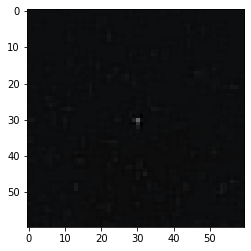

In [11]:
from matplotlib.pyplot import imshow

%matplotlib inline
imshow(np_img)
